# Tache 6

In [30]:
#import 
import numpy as np
from mp_api.client import MPRester
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer

# 1) Data

In [31]:
mp_key = "0xG7dCsc4AADF0PgqeiDeWIJa0gtg1Pd"
mp_id = "mp-9166"

In [32]:
with MPRester(mp_key) as m:
    struct = m.get_structure_by_material_id(mp_id)
    
conv_struct = SpacegroupAnalyzer(struct).get_conventional_standard_structure()

symmops = SpacegroupAnalyzer(conv_struct).get_space_group_operations()

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

# 2) 3 premiers pics du diffractogramme

Lorsqu'un réseau cristallin est soumis à un rayonnement X incident Cu Kα de longueur d’onde λ=1.54060 Å, celui-ci est en partie diffracté par les électrons des atomes du réseau. Dès lors, des déphasages peuvent apparaître entre les ondes diffusées par les différents atomes, provoquant des interférences constructives ou destructives.
Les pics de diffraction résultent de la diffraction constructive du rayon incident par les différents plans du réseau cristallin et apparaissent lorsque la condition de Bragg est respecté : nλ = 2d $\mathrm{sin}\ \theta$ ( d = distance entre les plans cristallins/ n = un nombre entier). L'intensité de ces pics dépend également de la multiplicité des plans cristallins, c’est-à-dire du nombre de plans équivalents qui diffractent sous le même angle. Plus cette multiplicité est élevée, plus l’intensité du pic sera forte. 












In [39]:
print( SpacegroupAnalyzer(conv_struct).get_crystal_system())

trigonal


In [40]:
# un rayonnement X incident Cu Kα de longueur d’onde λ=1.54060 Å

xrd = XRDCalculator(1.54060)

pattern = xrd.get_pattern(struct)

In [41]:
## stack des values afin de pouvoir réutiliser facilement le code pour plusieurs pics différents ou des pics plus lointains 
i_start = 1 ; 
Dictionnaire= {}
i_end = 3
lst_angle= {}
lst_intensity = {}
lst_plan_de_miller = {}
for i in range (i_start,i_end+1): 
    lst_angle[str(i)] = pattern.x[i-1]
    lst_intensity[str(i)] = pattern.y[i-1]
    lst_plan_de_miller[str(i)] = pattern.hkls[i-1]
    
Dictionnaire['angles']= lst_angle
Dictionnaire['intensity']= lst_intensity
Dictionnaire['plan de miller'] =lst_plan_de_miller

    

In [42]:
##output : détermination des 3 premiers pics du diffractogramme
for i in range (i_start,i_end+1): 
    print(f" {i}e pic du diffractogramme : ")
    print("----------------------------")
    print(f" angle du {i}e pic = {Dictionnaire['angles'][str(i)]}")
    print(f" intensité du {i}e pic = {Dictionnaire['intensity'][str(i)]}")
    print(f" indices hkl associés au {i}e pic = {Dictionnaire['plan de miller'][str(i)][0]['hkl']} de multiplicité : {Dictionnaire['plan de miller'][str(i)][0]['multiplicity']} ")
    print("\n")
    

 1e pic du diffractogramme : 
----------------------------
 angle du 1e pic = 18.802651525295552
 intensité du 1e pic = 15.140540975255556
 indices hkl associés au 1e pic = (1, 1, 1) de multiplicité : 2 


 2e pic du diffractogramme : 
----------------------------
 angle du 2e pic = 32.307398527457984
 intensité du 2e pic = 3.9296895003314964
 indices hkl associés au 2e pic = (1, 0, 0) de multiplicité : 6 


 3e pic du diffractogramme : 
----------------------------
 angle du 3e pic = 34.16699055588982
 intensité du 3e pic = 100.0
 indices hkl associés au 3e pic = (1, 1, 0) de multiplicité : 6 




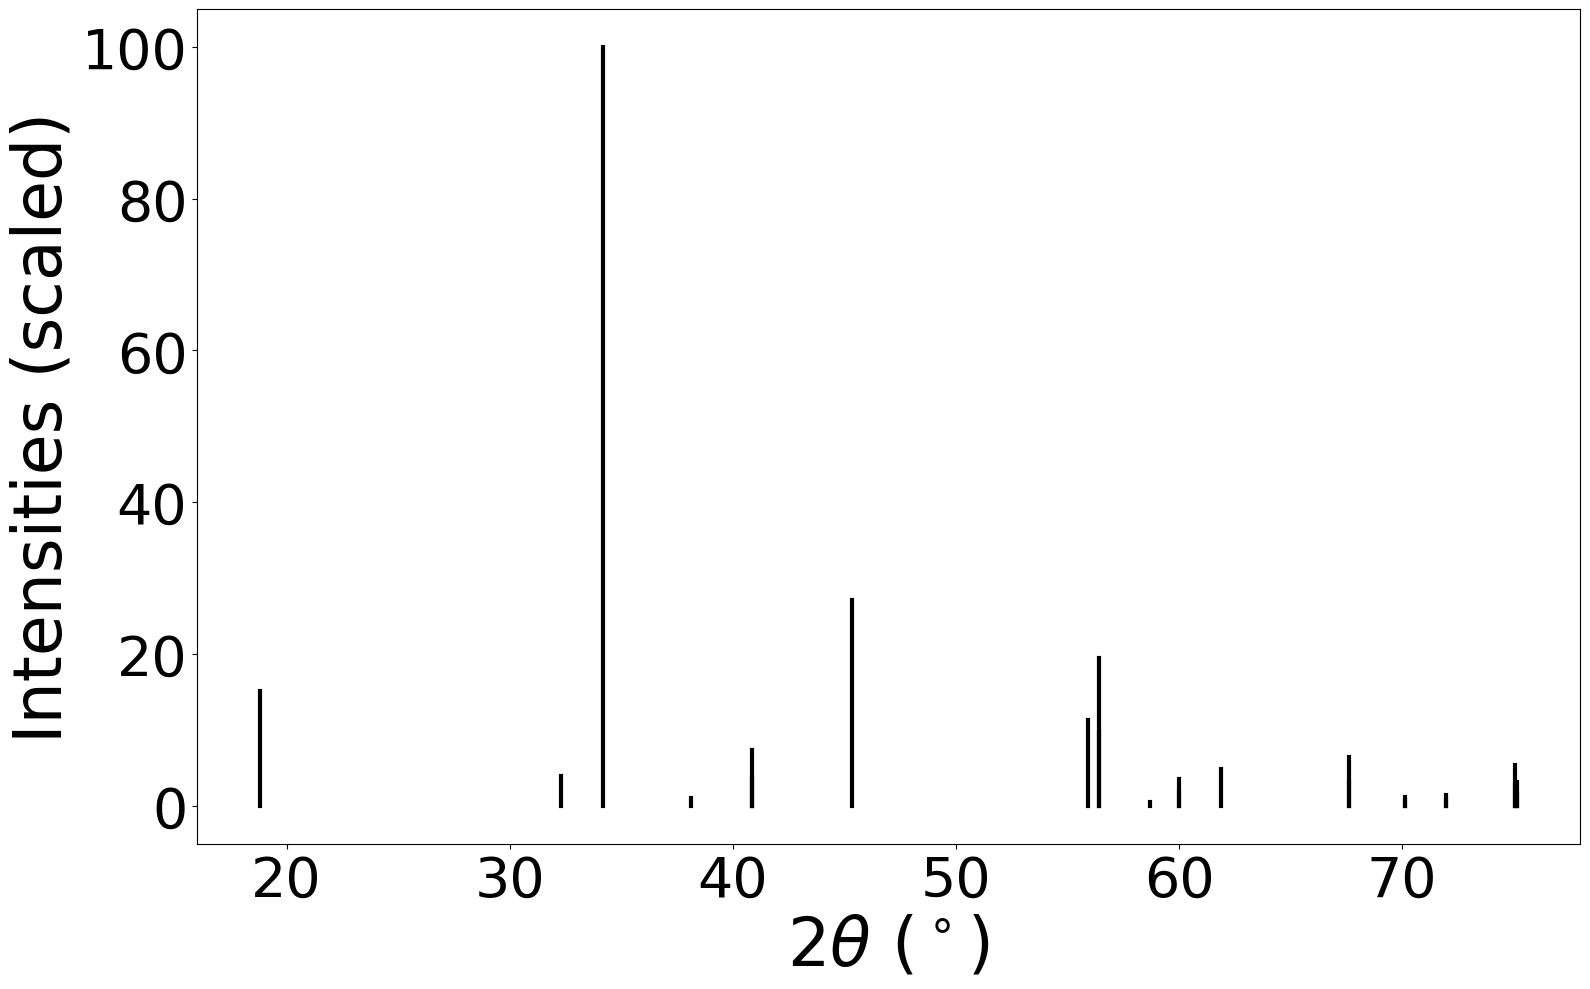

In [43]:


import matplotlib.pyplot as plt

fig = xrd.get_plot(struct, annotate_peaks="None", two_theta_range=(0, 80))
plt.show()  # Utilise plt.show() pour afficher correctement la figure
